In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [60]:
# upload the training dataset
training_data = pd.read_csv("train_data.csv")

In [61]:
training_data.head()

,Patient_ID,symptome 1,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Profession,Martial_Status,Sex,Age,Country,Smallpox
0,P22833,Swollen Lymph Nodes,True,True,True,True,False,True,False,False,Facilities manager,Single,M,62,Mauritania,1
1,P7988,Swollen Lymph Nodes,True,False,False,False,True,True,True,True,Chartered loss adjuster,Widowed,M,62,Wallis and Futuna,1
2,P12774,Swollen Lymph Nodes,True,False,False,True,True,True,False,False,Chief Financial Officer,Single,F,33,Brunei Darussalam,0
3,P972,Swollen Lymph Nodes,True,True,True,True,False,False,False,True,Database administrator,Divorced,F,46,Turkey,1
4,P23058,Swollen Lymph Nodes,True,True,True,False,True,False,True,True,Theatre director,Divorced,M,19,Namibia,1


In [62]:
training_data.shape

(17500, 16)

In [63]:
#select features columns out of training dataset
training_features = training_data.drop(columns = "Smallpox")

#select target column
target_column = training_data["Smallpox"]

### Preprocessing
SHOW THE NUMBER OF NAN VALUES IN THE DATA:

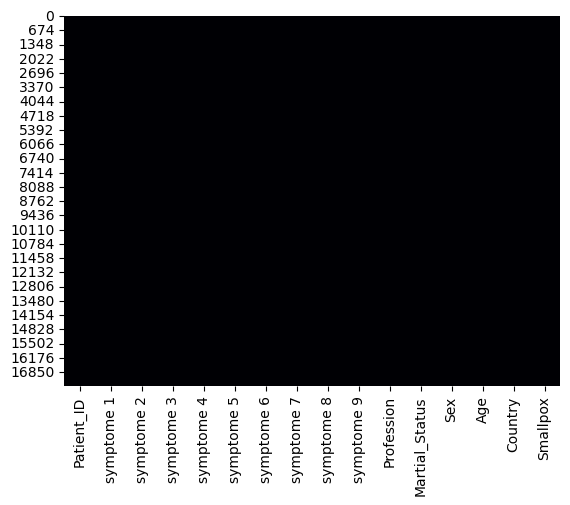

In [64]:
# training_data.isna().sum().sum() = 0 
sns.heatmap(training_data.isnull(),cmap = 'magma',cbar = False);

As we can see we haven't any NAN values.

In [65]:
# Drop id columns
training_data = training_data.drop(['Patient_ID'],axis=1)

In [66]:
col = list(training_data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(training_data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

training_data['Age'] = training_data['Age'].astype(int)
df1 = training_data.copy(deep = True)

Categorical Features : symptome 1 symptome 2 symptome 3 symptome 4 symptome 5 symptome 6 symptome 7 symptome 8 symptome 9 Martial_Status Sex Smallpox
Discrete Features : Profession Age Country


Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a discrete feature.
* Now, let's transform categorical columns to dummies variables:

In [67]:
le = LabelEncoder()
# text_data_features = categorical_features
text_data_features = ['symptome 1', 'symptome 2', 'symptome 3', 'symptome 4', 'symptome 5', 'symptome 6', 'symptome 7', 'symptome 8', 'symptome 9', 'Profession','Martial_Status', 'Sex', 'Country']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); 
    l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))
# df1

Label Encoder Transformation


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 116.99it/s]

symptome 1  :  [3 2 0 1]  =  ['Swollen Lymph Nodes' 'None' 'Fever' 'Muscle Aches and Pain']
symptome 2  :  [1 0]  =  [ True False]
symptome 3  :  [1 0]  =  [ True False]
symptome 4  :  [1 0]  =  [ True False]
symptome 5  :  [1 0]  =  [ True False]
symptome 6  :  [0 1]  =  [False  True]
symptome 7  :  [1 0]  =  [ True False]
symptome 8  :  [0 1]  =  [False  True]
symptome 9  :  [0 1]  =  [False  True]
Profession  :  [239  89  95 152 600 402 613 596 196 297 551 507 450 146 337 347  46 192
  23 386 308 368 412 324 232 617 258 242 210 526 405 343  82 463  65 427
 282 425 322   5 376  40 389 183 491 352 125 550 529 574 273 564 323 492
 474 606 121 123 213 176 364 224 231 416 271 431 219 348 306 547  96 536
  41 301 206 158 313 572 523 501 449 335  87 204 394 237 129  53 569 128
 149 366 430  78 223 281 542 485 579  88 175 565 286 209 540 627  67 567
 638 563   3   9 462 302 481 170 290 541 531 102 147 319 130 500 154 132
 399 460 538 372  55 593 454 117 233 315  74 203  69 254 151 106 103 4

In [68]:
df1.head()

,symptome 1,symptome 2,symptome 3,symptome 4,symptome 5,symptome 6,symptome 7,symptome 8,symptome 9,Profession,Martial_Status,Sex,Age,Country,Smallpox
0,3,1,1,1,1,0,1,0,0,239,2,1,62,136,1
1,3,1,0,0,0,1,1,1,1,89,3,1,62,238,1
2,3,1,0,0,1,1,1,0,0,95,2,0,33,32,0
3,3,1,1,1,1,0,0,0,1,152,0,0,46,222,1
4,3,1,1,1,0,1,0,1,1,600,0,1,19,149,1


##### Visualisation of target (Smallpox)

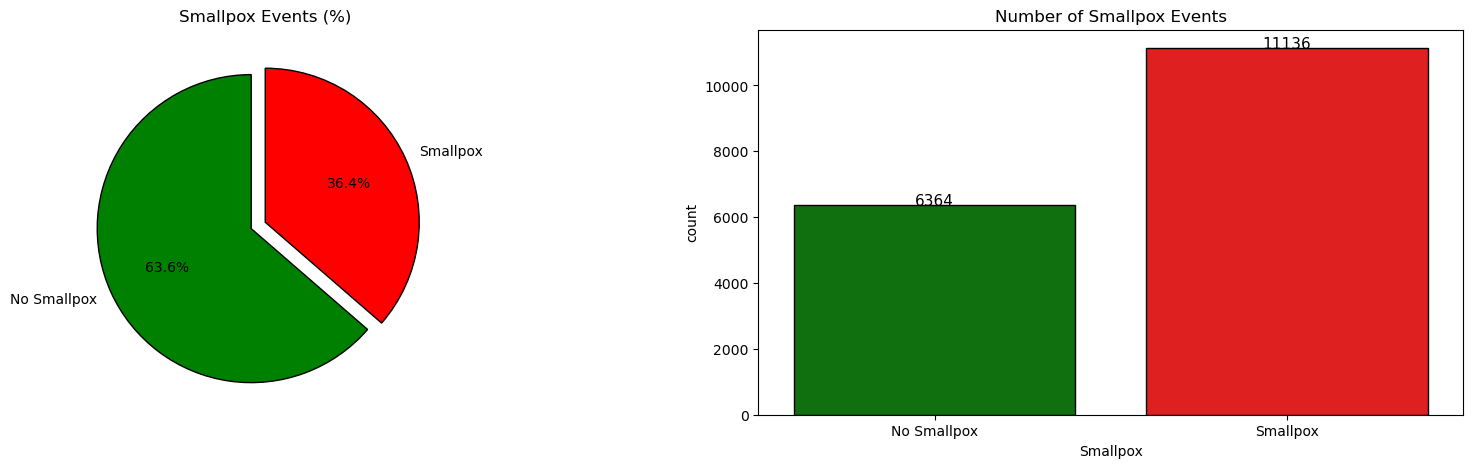

In [69]:
l = list(df1['Smallpox'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

colors = ['green','red']
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Smallpox','Smallpox'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = ['green','red'],wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smallpox Events (%)');

plt.subplot(1,2,2)
ax = sns.countplot('Smallpox',data = df1, palette = ['green','red'],edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Smallpox','Smallpox'])
plt.title('Number of Smallpox Events');
plt.show()

#### Distribution of discreat features

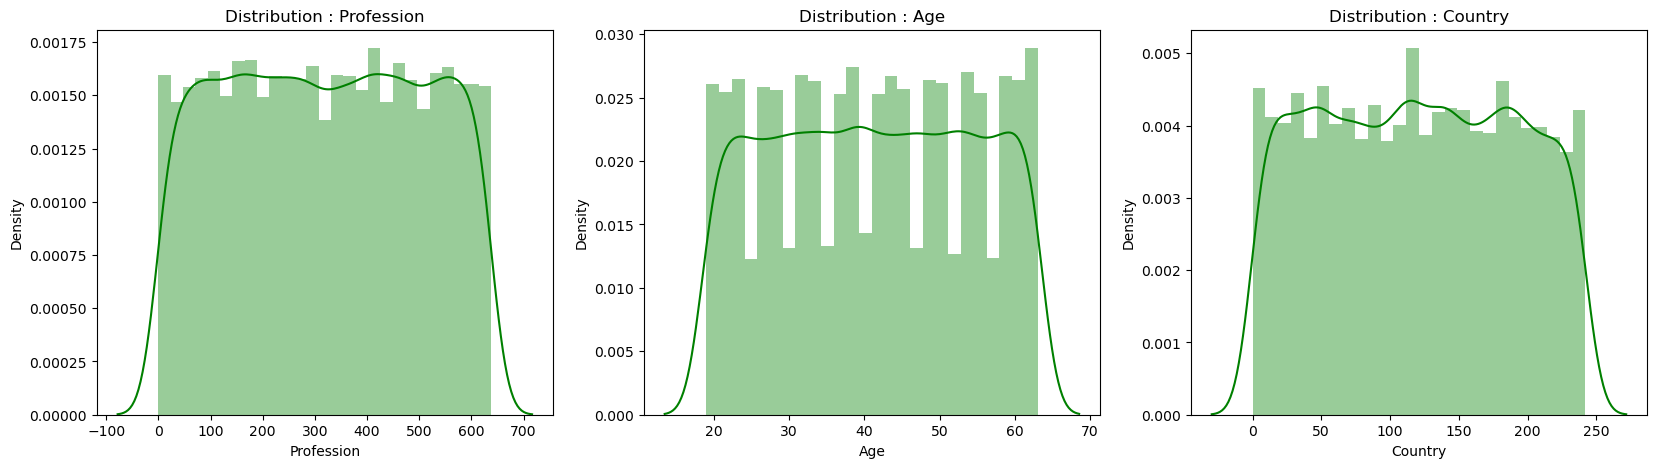

In [70]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = 'green')
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

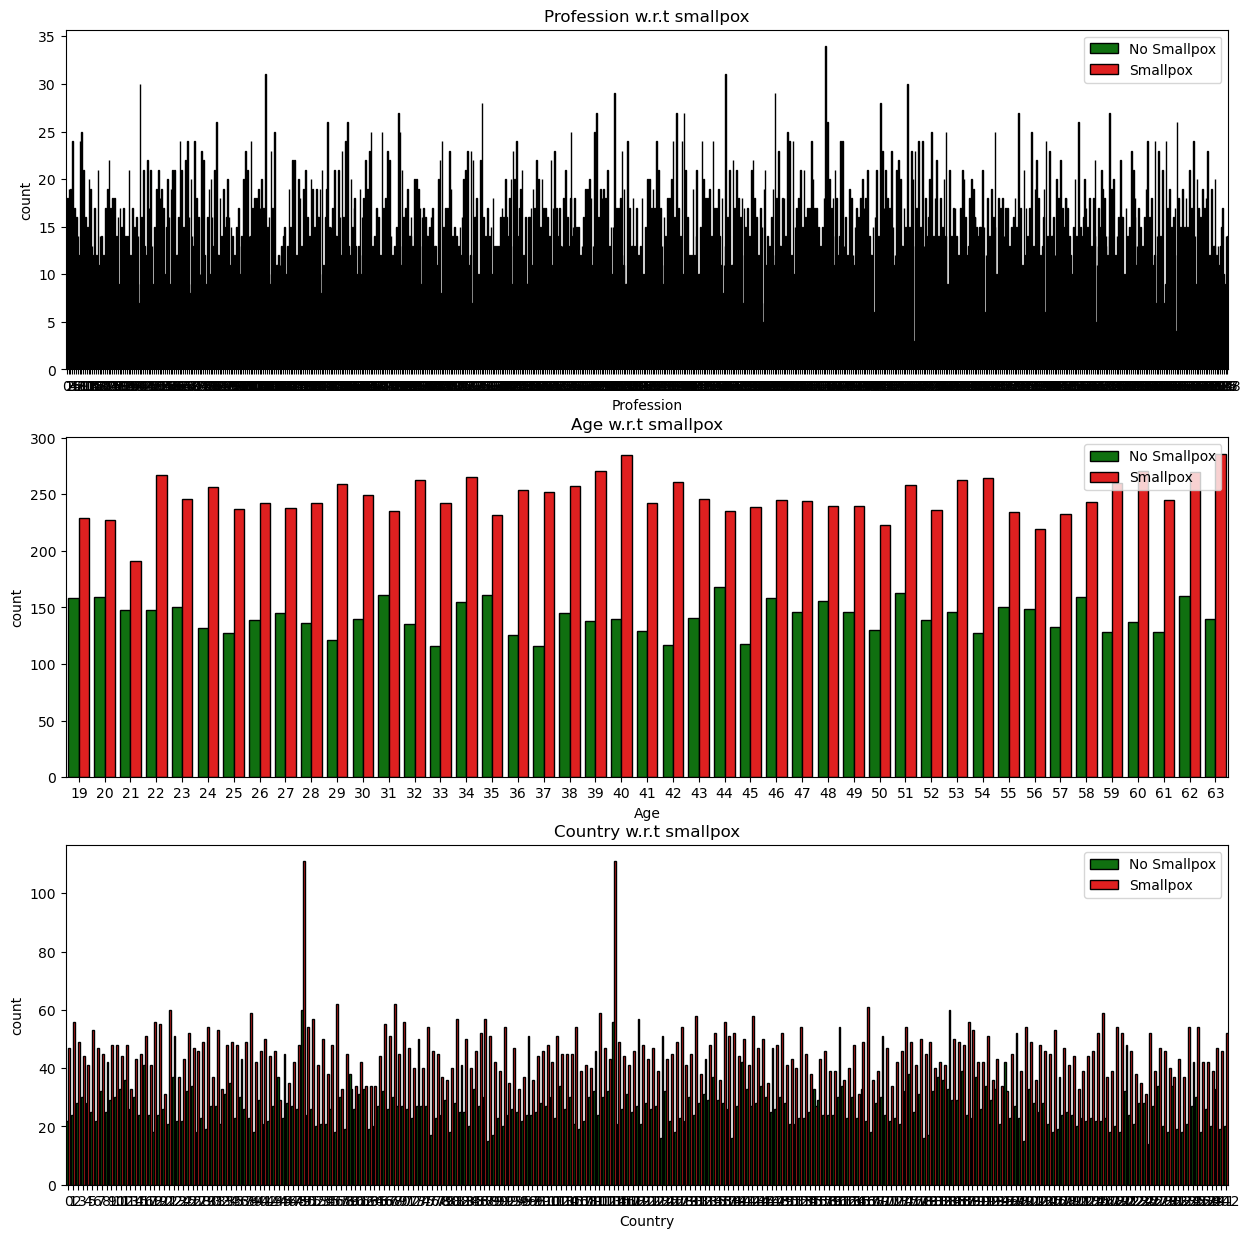

In [71]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(discrete_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(discrete_features[i],data = df1,hue = "Smallpox",palette = colors,edgecolor = 'black')
    plt.legend(['No Smallpox', 'Smallpox'] ,loc = 'upper right')
    title = discrete_features[i] + ' w.r.t smallpox'
    plt.title(title);

#### Distribution of categorical features

12


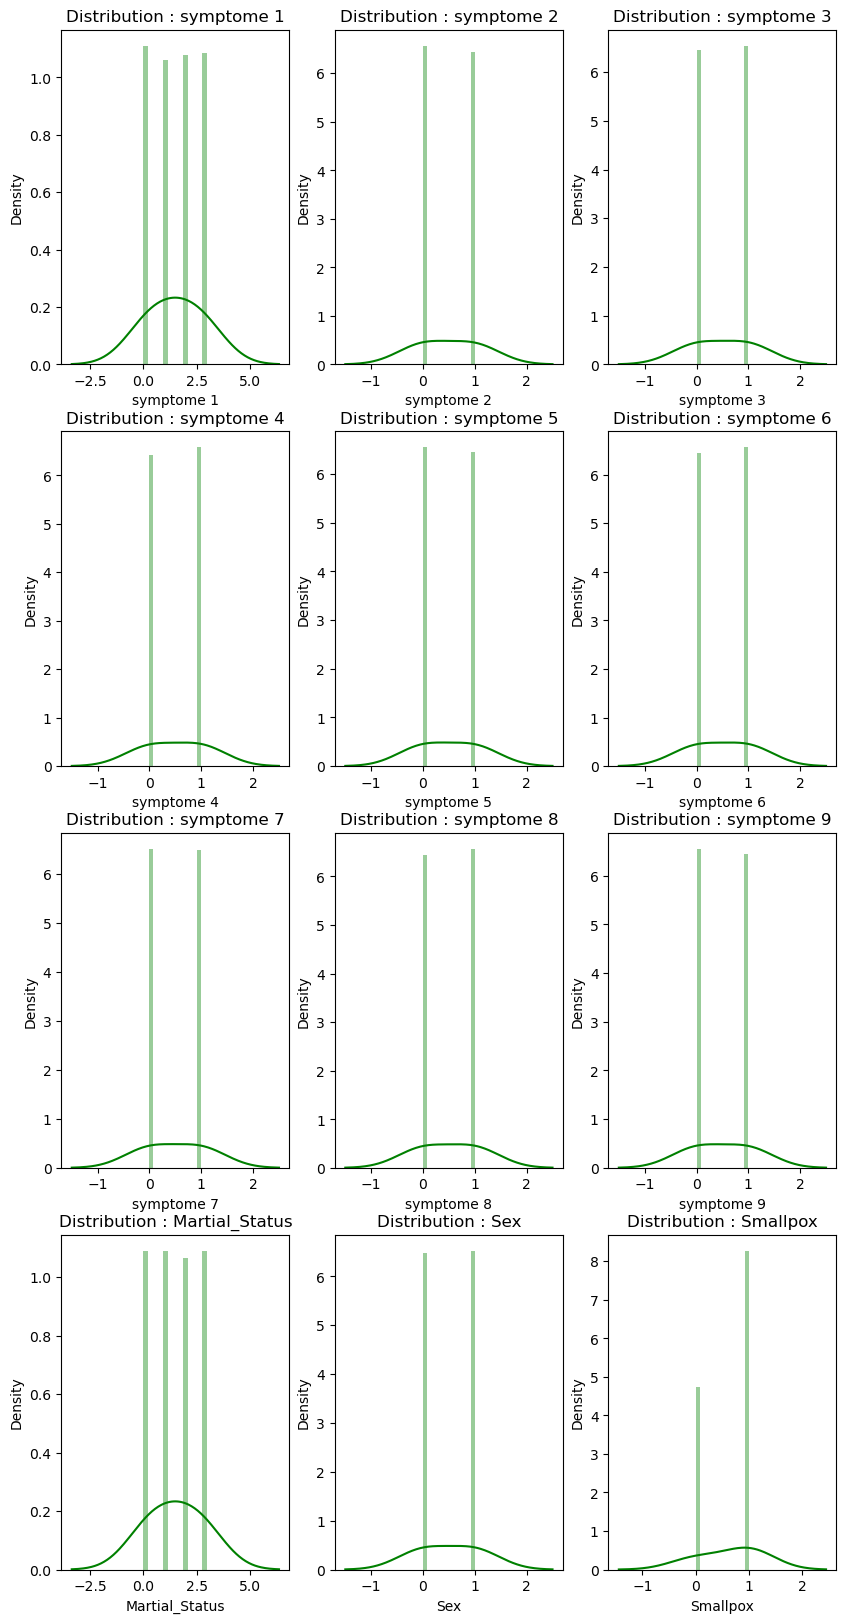

In [72]:
# categorical_features.remove('Smallpox')
print(len(categorical_features))

fig, ax = plt.subplots(nrows = 4,ncols = 3,figsize = (10,20))
for i in range(len(categorical_features)):
    plt.subplot(4,3,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

All the categorical features are Normally Distributed.

#### Categorical features vs target

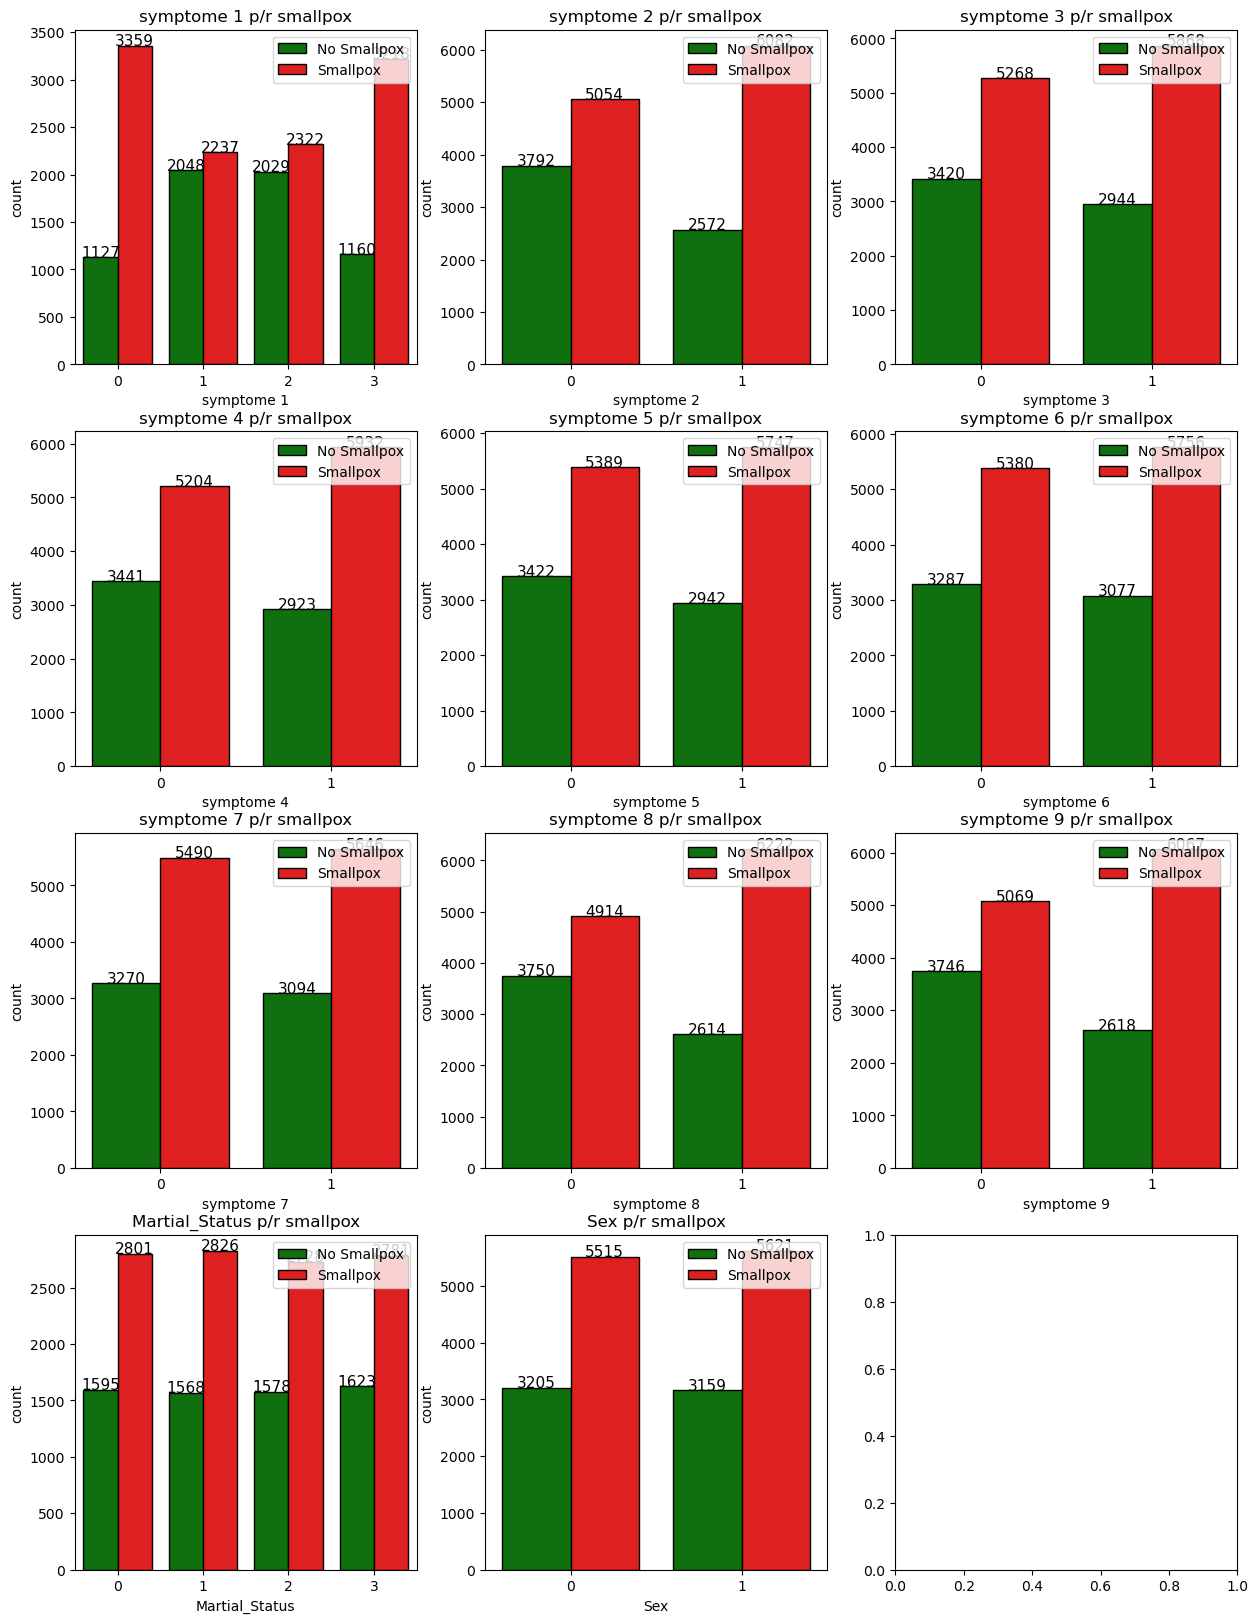

In [73]:
fig = plt.subplots(nrows = 4,ncols = 3,figsize = (15,20))
for i in range(11):
    plt.subplot(4,3,i+1)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "Smallpox",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.legend(['No Smallpox', 'Smallpox'], loc = 'upper right')
    title = categorical_features[i] + ' p/r smallpox'
    plt.title(title);

- all the graphes shown the same pattern.
- Female or male no difference for smallpox disease.
- 0 and 3 symptome 1 has recorded more cases of Smallpox than 1 and 2.


Discrete features vs Discrete features w.r.t Target variable (stroke)

['Profession', 'Age', 'Country']


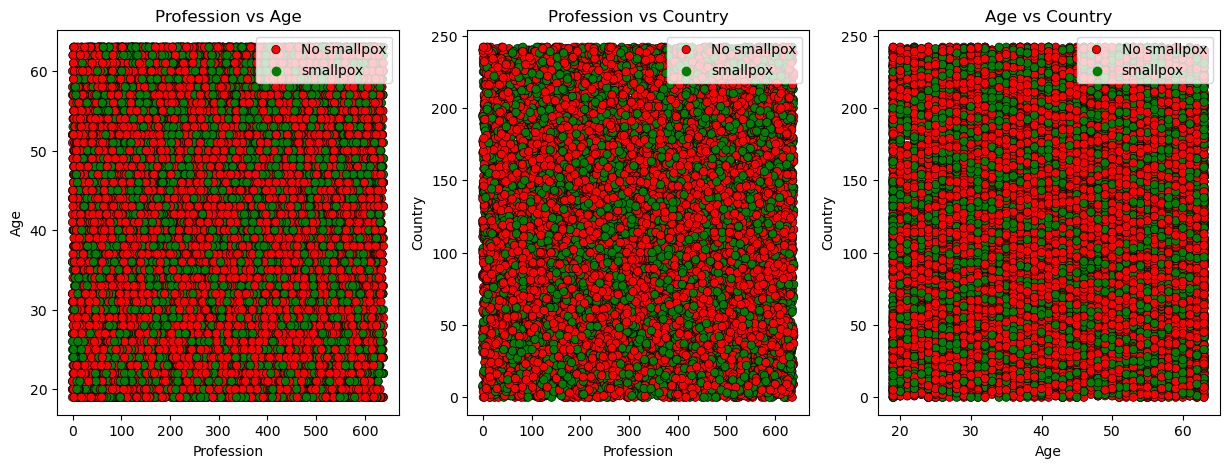

In [74]:
a = 0
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5),squeeze = False)
for i in range(len(discrete_features) - 1):
    for j in range(len(discrete_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(1,3,a)
            sns.scatterplot(x = discrete_features[i],y = discrete_features[j],data = df1,hue = 'Smallpox',palette = colors,edgecolor = 'black');
            title = discrete_features[i] + ' vs ' + discrete_features[j]
            plt.legend(['No smallpox','smallpox'], loc = 'upper right',)
            plt.title(title)
print(discrete_features)

- Due to the imbalance nature of the data, cases of smallpox & no smallpox cannot be separated.
- No insights can be interpreted from the above graphs.

# Modeling

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


In [76]:
x = df1.drop(['Smallpox'], axis=1)
y = df1['Smallpox']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 2)

x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

1) Logistic regression

In [77]:
from sklearn.linear_model import LogisticRegression
import sklearn
lr_model = LogisticRegression()

In [78]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))
#     print("recallscore on training set:", sklearn.metrics.recall_score(y_test, classifier.predict(x_test)))

Cross Validation Score :  64.79%
ROC_AUC Score :  56.73%


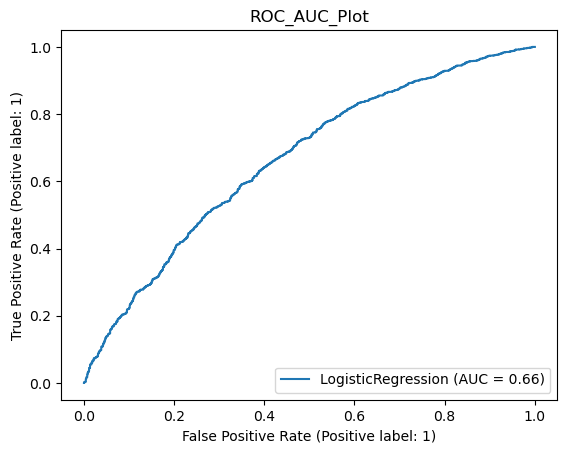

              precision    recall  f1-score   support

           0       0.60      0.22      0.32       965
           1       0.67      0.91      0.77      1660

    accuracy                           0.66      2625
   macro avg       0.63      0.57      0.55      2625
weighted avg       0.64      0.66      0.61      2625



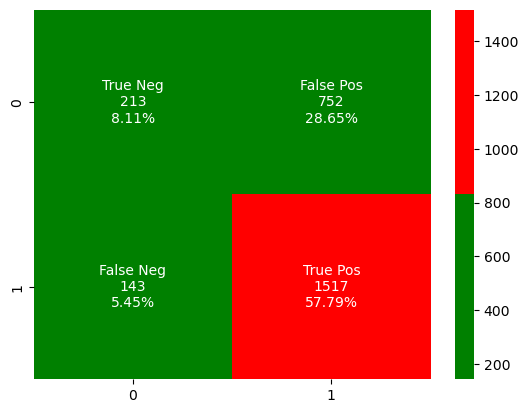

In [79]:
model(lr_model,x_train,y_train,x_test,y_test)
model_evaluation(lr_model,x_test,y_test)

Feature: symptome 1,        Score: -0.05132
Feature: symptome 2,        Score: 0.56443
Feature: symptome 3,        Score: 0.22713
Feature: symptome 4,        Score: 0.25078
Feature: symptome 5,        Score: 0.19810
Feature: symptome 6,        Score: 0.05371
Feature: symptome 7,        Score: 0.04570
Feature: symptome 8,        Score: 0.57617
Feature: symptome 9,        Score: 0.52989
Feature: Profession,        Score: -0.00026
Feature: Martial_Status,        Score: -0.01163
Feature: Sex,        Score: -0.05659
Feature: Age,        Score: -0.00462
Feature: Country,        Score: -0.00038


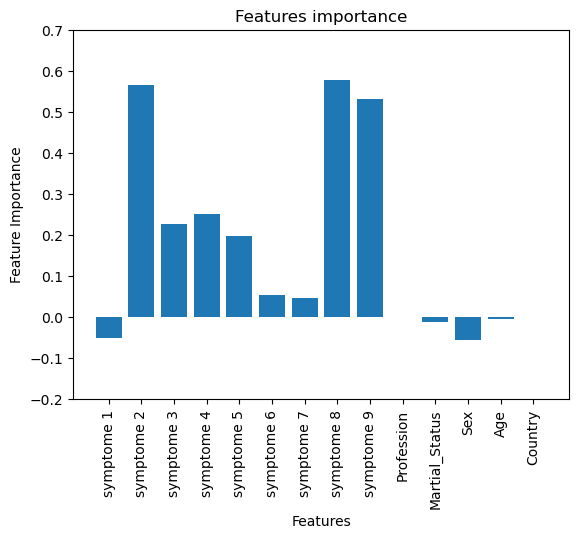

In [80]:
# get importance
importance = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s,        Score: %.5f' % (x_train.columns[i],v))
# plot feature importance
plt.ylim(-0.2, 0.7)
fig = plt.figure(1, figsize=(10, 3))

plt.bar([x_train.columns[x] for x in range(len(importance))], importance)
plt.ylabel("Feature Importance")
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.title('Features importance')

plt.show()

In [81]:
x_train.columns[0]

'symptome 1'

## TEST DATA | Generate Predictions on Validation DataSet

In [431]:
original_validation_data = pd.read_csv('validation_data.csv')
validation_data = original_validation_data.set_index('trustii_id')

# Drop id columns
validation_data = validation_data.drop(['Patient_ID'],axis=1)

transforme data test from categories to dommies

In [432]:
le = LabelEncoder()
# text_data_features = categorical_features
text_data_features = ['symptome 1', 'symptome 2', 'symptome 3', 'symptome 4', 'symptome 5', 'symptome 6', 'symptome 7', 'symptome 8', 'symptome 9', 'Profession','Martial_Status', 'Sex', 'Country']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    validation_data[i] = le.fit_transform(test_data[i])
    l3.append(list(test_data[i].unique())); 
    l4.append(list(le.inverse_transform(validation_data[i].unique())))

Label Encoder Transformation


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 629.93it/s]


In [429]:
X_valid = validation_data.values
y_pred_valid = lr_model.predict(X_valid)

In [439]:
original_validation_data['Smallpox'] = y_pred_valid
# original_validation_data.to_csv('my_submission.csv', index=False, encoding='UTF-8')